# Ordered probit

Based on the model in Handy S, Cao X and Mokhtarian P (2005) Correlation or causality between the built environment and travel behavior? Evidence from Northern California. Transportation Research Part D: Transport and Environment 10(6): 427–444. DOI: 10.1016/j.trd.2005.05.002.


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
thresh = [0, 0.543, 2.142, 2.589]

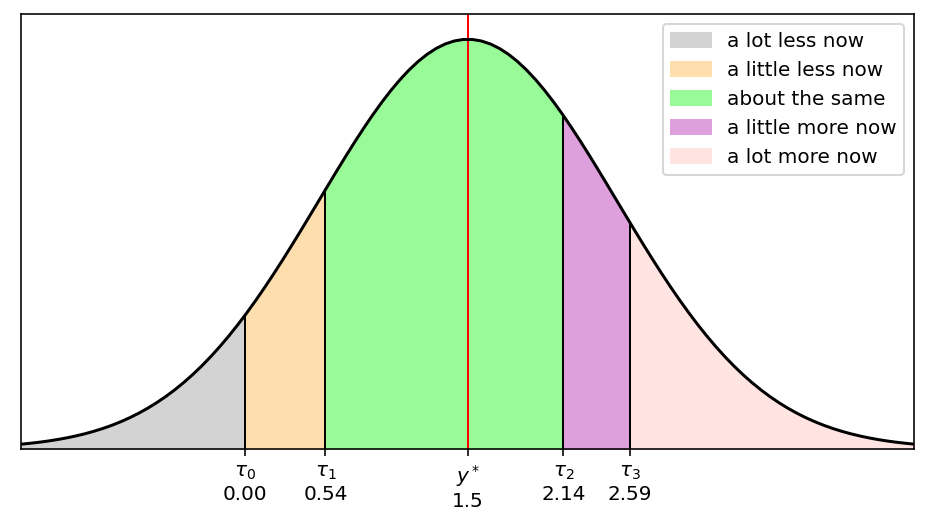

In [3]:
ystar = 1.5
plt.figure(figsize=(8, 4))
x = np.linspace(ystar - 3, ystar + 3, 100)
plt.xlim(x.min(), x.max())
y = scipy.stats.norm.pdf(x, loc=ystar)
plt.ylim(0, y.max() + 0.025)
plt.axvline(ystar, color='red', lw=1)
plt.savefig('../fig/oprobit_ystar.pdf')
plt.xticks([*thresh, ystar], [*[f'$τ_{i}$\n{t:.2f}' for i, t in enumerate(thresh)], f'$y^*$\n{ystar}'])
plt.yticks([])
plt.plot(x, y, color='black')
plt.savefig('../fig/oprobit_norm.pdf')

for t in thresh:
    plt.plot([t, t], [0, scipy.stats.norm.pdf(t, loc=ystar)], color='black', lw=1)
    
allThresh = np.array([np.min(x) - 1, *thresh, np.max(x) + 1])
    
for lr, lbl, col in zip(zip(allThresh[:-1], allThresh[1:]), ['a lot less now', 'a little less now', 'about the same', 'a little more now', 'a lot more now'], ['lightgray', 'navajowhite', 'palegreen', 'plum', 'mistyrose']):
    lt, rt = lr
    xt = np.linspace(lt, rt, 50)
    yt = scipy.stats.norm.pdf(xt, loc=ystar)
    plt.fill_between(xt, np.zeros_like(xt), yt, color=col, label=lbl)
    
plt.legend()
plt.savefig('../fig/oprobit_fill.pdf')


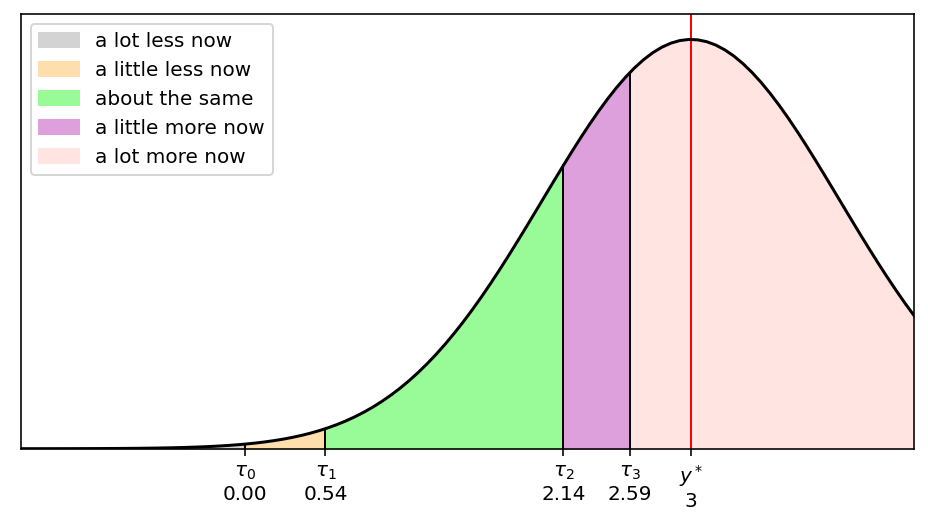

In [4]:
ystar = 3
plt.figure(figsize=(8, 4))
x = np.linspace(-1.5, 4.5, 100)
plt.xlim(x.min(), x.max())
y = scipy.stats.norm.pdf(x, loc=ystar)
plt.ylim(0, y.max() + 0.025)
plt.axvline(ystar, color='red', lw=1)
plt.xticks([*thresh, ystar], [*[f'$τ_{i}$\n{t:.2f}' for i, t in enumerate(thresh)], f'$y^*$\n{ystar}'])
plt.yticks([])
plt.plot(x, y, color='black')

for t in thresh:
    plt.plot([t, t], [0, scipy.stats.norm.pdf(t, loc=ystar)], color='black', lw=1)
    
allThresh = np.array([np.min(x) - 1, *thresh, np.max(x) + 1])
    
for lr, lbl, col in zip(zip(allThresh[:-1], allThresh[1:]), ['a lot less now', 'a little less now', 'about the same', 'a little more now', 'a lot more now'], ['lightgray', 'navajowhite', 'palegreen', 'plum', 'mistyrose']):
    lt, rt = lr
    xt = np.linspace(lt, rt, 50)
    yt = scipy.stats.norm.pdf(xt, loc=ystar)
    plt.fill_between(xt, np.zeros_like(xt), yt, color=col, label=lbl)
    
plt.legend()
plt.savefig('../fig/oprobit_moved.pdf')